In [1]:
import requests, sys, random, csv, array
import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
temp = []
base = ['','','','','','','','','','','','','']
i = 1
j = 0
print("Cколько последовательностей взять на проверку?")
goal = int(input())
with open('human-genes.txt', 'r', newline='') as csvfile:
    f = csv.reader(csvfile, delimiter=',')
    data = list(f)
    while i < goal+1:
        tmp_nmb = randint(1, 4000)
        server = "https://rest.ensembl.org"
        if data[tmp_nmb][4] == "+":
            ext = "/sequence/region/human/1:" + data[tmp_nmb][6] + ".." + data[tmp_nmb][7] +":1?expand_5prime=10"
        else:
            ext = "/sequence/region/human/1:" + data[tmp_nmb][6] + ".." + data[tmp_nmb][7] +":-1?expand_5prime=10"
        r = requests.get(server+ext, headers={ "Content-Type" : "text/x-fasta"})
        if not r.ok:
            r.raise_for_status()
            sys.exit()
        tmp = str(r.text)
        tmp = tmp.split('\n')
        res = str(tmp[1][0:20])
        res = res[(res.find("ATG")-7):res.find("ATG")+6]
        if len(res) == 13:
            while j < 13:
                base[j] += res[j]
                j += 1
            if (i+1) % 10 == 0 or (i+1) == goal:
                print("Получено " + str(i+1) + " из " + str(goal))
            i += 1
            j = 0           
total = np.zeros(shape=(13, 4), dtype=float)
i = 0
for x in base:
    total[i][0] = round(np.log((x.count('A')+0.1)/(goal+0.1)/0.295), 3)
    total[i][1] = round(np.log((x.count('T')+0.1)/(goal+0.1)/0.295), 3)
    total[i][2] = round(np.log((x.count('G')+0.1)/(goal+0.1)/0.205), 3)
    total[i][3] = round(np.log((x.count('C')+0.1)/(goal+0.1)/0.205), 3)
    i += 1
i = 0
total = total.transpose()
prob = np.zeros(shape=(13, 4), dtype=float)
for x in base:
    prob[i][0] = round(x.count('A')/goal,3)
    prob[i][1] = round(x.count('T')/goal,3)
    prob[i][2] = round(x.count('G')/goal,3)
    prob[i][3] = round(x.count('C')/goal,3)
    i += 1
i = 0
prob = prob.transpose()

Cколько последовательностей взять на проверку?
40
Получено 10 из 40
Получено 20 из 40
Получено 30 из 40
Получено 40 из 40


In [3]:
rate = pd.DataFrame(total, index = ['A','T','G','C'])
rate


0      1      2      3      4      5      6      7      8      9   \
A  0.023 -0.841 -0.511  0.176  0.530  0.308 -0.262  1.221 -4.773 -4.773   
T -0.662 -0.662 -0.662 -2.375 -2.375 -1.339 -1.339 -4.773  1.221 -4.773   
G  0.206  0.732  0.387  0.300  0.466  0.206  0.540 -4.409 -4.409  1.585   
C  0.387  0.387  0.608  0.540 -0.298  0.300  0.540 -4.409 -4.409 -4.409   

      10     11     12  
A  0.102 -0.064 -1.060  
T -1.060 -0.158 -0.511  
G  0.608 -0.015  0.894  
C -0.015  0.300  0.102

In [4]:
probs = pd.DataFrame(prob, index = ['A','T','G','C'])
probs

0      1      2      3      4      5      6    7    8    9      10  \
A  0.30  0.125  0.175  0.350  0.500  0.400  0.225  1.0  0.0  0.0  0.325   
T  0.15  0.150  0.150  0.025  0.025  0.075  0.075  0.0  1.0  0.0  0.100   
G  0.25  0.425  0.300  0.275  0.325  0.250  0.350  0.0  0.0  1.0  0.375   
C  0.30  0.300  0.375  0.350  0.150  0.275  0.350  0.0  0.0  0.0  0.200   

      11     12  
A  0.275  0.100  
T  0.250  0.175  
G  0.200  0.500  
C  0.275  0.225

In [5]:
print("Cколько последовательностей взять на положительный контроль?")
goal = int(input())
scr_arr = []
i = 1
with open('human-genes.txt', 'r', newline='') as csvfile:
    f = csv.reader(csvfile, delimiter=',')
    data = list(f)
    while i < goal+1:
        tmp_nmb = randint(1, 4000)
        server = "https://rest.ensembl.org"
        if data[tmp_nmb][4] == "+":
            ext = "/sequence/region/human/1:" + data[tmp_nmb][6] + ".." + data[tmp_nmb][7] +":1?expand_5prime=10"
        else:
            ext = "/sequence/region/human/1:" + data[tmp_nmb][6] + ".." + data[tmp_nmb][7] +":-1?expand_5prime=10"
        r = requests.get(server+ext, headers={ "Content-Type" : "text/x-fasta"})
        if not r.ok:
            r.raise_for_status()
            sys.exit()
        tmp = str(r.text)
        tmp = tmp.split('\n')
        res = str(tmp[1][0:20])
        
        res = res[(res.find("ATG")-7):res.find("ATG")+6]
        if len(res) == 13:
            score = 0
            while j < 13:
                if res[j] == "A":
                    score +=  total[0][j] 
                if res[j] == "T":
                    score +=  total[1][j]
                if res[j] == "G":
                    score +=  total[2][j]
                if res[j] == "C":
                    score +=  total[3][j]
                j += 1
            scr_arr.append(score)
            i += 1
            j = 0
print(scr_arr)

Cколько последовательностей взять на положительный контроль?
60
[4.848000000000001, 5.091000000000001, 6.212000000000001, 2.751, 6.080000000000001, 3.779000000000001, 3.548, 3.9859999999999998, 7.279999999999999, 6.574, 4.138999999999999, 4.9030000000000005, 2.216, 5.917, 1.3929999999999998, 8.889, 4.890999999999999, 3.3879999999999995, 6.0040000000000004, 7.412, 7.643999999999999, 8.134, -5.276999999999999, 5.207000000000001, 4.561000000000001, 6.132000000000001, 3.256, 1.8940000000000001, 5.857, 5.784, 2.3339999999999996, 2.53, 7.304, 5.377, 6.779000000000001, 7.342, 5.591, 7.151999999999999, 2.703, 4.256, 1.2720000000000002, 3.23, 5.681, 5.348, 4.1419999999999995, 6.029999999999999, 6.931, 6.580000000000001, 5.273, 4.346000000000001, 3.426, 7.614, 8.835999999999999, 2.2479999999999998, 0.14700000000000057, 8.197, 7.779000000000001, 6.942000000000001, 4.433, 7.643999999999999]


In [7]:
print("Cколько последовательностей взять на отрицательный контроль?")
goal = int(input())
scr_min = []
i = 0
j = 0
with open('Covid_gen.fasta', 'r', newline='') as myfile:
    f2 = myfile.readlines()
    f2[0] = ''
    gene = ''.join(f2)
    gene = gene.replace('\r\n', '')
with open('SARS-CoV-2_feat-table.csv', 'r', newline='') as csvfile:
    f1 = csv.reader(csvfile, delimiter=',')
    data2 = list(f1)
    while i < goal:
        tmp_nmb = randint(1, 750)
        if data2[tmp_nmb][3] == "pattern:ATG":
            ext = gene[(int(data2[tmp_nmb][0])-8):(int(data2[tmp_nmb][1])+3)]
        if len(ext) == 13:
            score = 0
            while j < 13:
                if ext[j] == "A":
                    score +=  total[0][j] 
                if ext[j] == "T":
                    score +=  total[1][j]
                if ext[j] == "G":
                    score +=  total[2][j]
                if ext[j] == "C":
                    score +=  total[3][j]
                j += 1
            scr_min.append(score)
            i += 1
            j = 0
print(scr_min)

Cколько последовательностей взять на отрицательный контроль?
60
[1.5590000000000002, -2.8720000000000003, -3.335000000000001, 1.3230000000000004, 5.438, 3.5470000000000006, -1.227, 1.654, 2.726, -1.9999999999999998, 1.5590000000000002, -2.6640000000000015, 0.02799999999999976, -0.7890000000000003, -0.7890000000000003, -0.44499999999999973, 3.6370000000000005, 2.9919999999999995, -3.2500000000000004, 4.499, -2.0829999999999997, 5.4030000000000005, 0.6900000000000003, 1.379, 0.9839999999999998, -0.45300000000000007, 3.126, 3.201, 3.8619999999999997, -0.9949999999999998, 3.397, 2.0330000000000004, 2.5330000000000004, 3.774, -1.3610000000000004, 1.6709999999999998, 1.1679999999999997, 1.7010000000000005, 0.4910000000000002, 4.938000000000001, 6.982, -2.364, -2.364, -0.7220000000000003, 5.380999999999999, 2.5330000000000004, 5.714, 1.605, -1.2279999999999998, 4.6579999999999995, 3.744, 0.6900000000000003, 0.5310000000000001, 0.3410000000000001, 1.645, 3.433, 2.8729999999999998, 3.575, 4.052

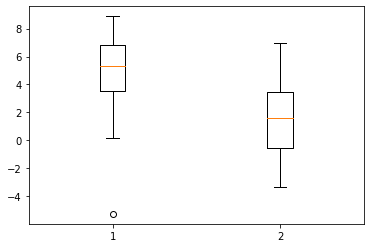

In [8]:
data = [scr_arr, scr_min]
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()